In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### 1

In [2]:
import pandas as pd

In [6]:
df=pd.read_csv('Salaries.csv')
df.head(10)

,rank,discipline,phd,service,gender,salary
0,Prof,B,56.0,49,Male,186960.0
1,Prof,A,12.0,6,Male,93000.0
2,Prof,A,23.0,20,Male,110515.0
3,Prof,A,40.0,31,Male,131205.0
4,Prof,B,20.0,18,Male,104800.0
5,Prof,A,20.0,20,Male,122400.0
6,AssocProf,A,20.0,17,Male,81285.0
7,Prof,A,18.0,18,Male,NaN
8,Prof,A,29.0,19,Male,94350.0
9,Prof,A,51.0,51,Male,57800.0


### 2

In [7]:
df.tail(15)

,rank,discipline,phd,service,gender,salary
63,Prof,A,29.0,27,Female,91000.0
64,AssocProf,A,26.0,24,Female,73300.0
65,Prof,A,36.0,19,Female,117555.0
66,AsstProf,A,7.0,6,Female,63100.0
67,Prof,A,17.0,11,Female,90450.0
68,AsstProf,A,4.0,2,Female,77500.0
69,Prof,A,28.0,7,Female,116450.0
70,AsstProf,A,8.0,3,Female,78500.0
71,AssocProf,B,12.0,9,Female,71065.0
72,Prof,B,24.0,15,Female,161101.0


### 3

In [13]:
max_salary_male_professor = df[(df['gender'] == 'Male') & (df['rank'] == 'Prof')]['salary'].max()
min_salary_male_professor = df[(df['gender'] == 'Male') & (df['rank'] == 'Prof')]['salary'].min()
max_salary_female_professor = df[(df['gender'] == 'Female') & (df['rank'] == 'Prof')]['salary'].max()
min_salary_female_professor = df[(df['gender'] == 'Female') & (df['rank'] == 'Prof')]['salary'].min()
print("Highest salary of Male Professor:", max_salary_male_professor)
print("Lowest salary of Male Professor:", min_salary_male_professor)
print("Highest salary of Female Professor:", max_salary_female_professor)
print("Lowest salary of Female Professor:", min_salary_female_professor)

Highest salary of Male Professor: 186960.0
Lowest salary of Male Professor: 57800.0
Highest salary of Female Professor: 161101.0
Lowest salary of Female Professor: 90450.0


### 4

In [14]:
max_salary_professor = df[df['rank'] == 'Prof']['salary'].max()
min_salary_professor = df[df['rank'] == 'Prof']['salary'].min()
print("Highest salary of Professor:", max_salary_professor)
print("Lowest salary of Professor:", min_salary_professor)

Highest salary of Professor: 186960.0
Lowest salary of Professor: 57800.0


### 5

In [16]:
df['salary'] = df.groupby('service')['salary'].transform(lambda x: x.fillna(x.mean()))
df.head(10)

,rank,discipline,phd,service,gender,salary
0,Prof,B,56.0,49,Male,186960.0
1,Prof,A,12.0,6,Male,93000.0
2,Prof,A,23.0,20,Male,110515.0
3,Prof,A,40.0,31,Male,131205.0
4,Prof,B,20.0,18,Male,104800.0
5,Prof,A,20.0,20,Male,122400.0
6,AssocProf,A,20.0,17,Male,81285.0
7,Prof,A,18.0,18,Male,119190.0
8,Prof,A,29.0,19,Male,94350.0
9,Prof,A,51.0,51,Male,57800.0


### 6

In [18]:
df['phd'] = df.groupby('service')['phd'].transform(lambda x: x.fillna(x.mean()))

### 7

Number of Male Staff: 39
Number of Female Staff: 39


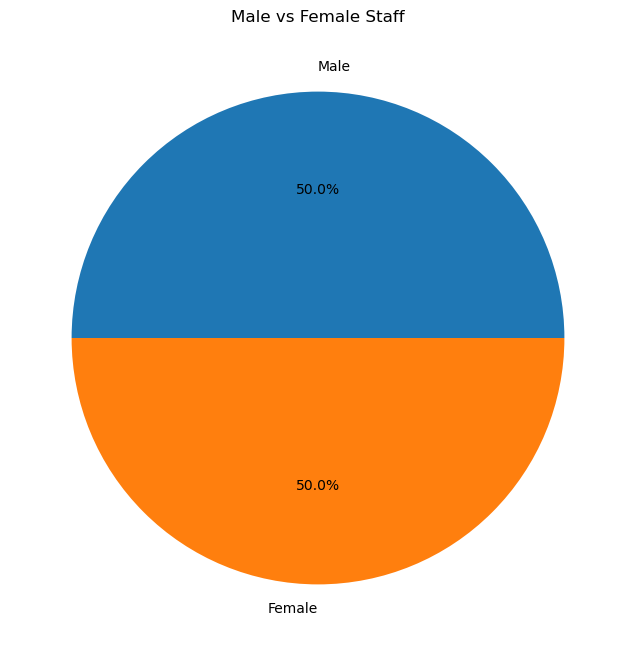

In [28]:
import matplotlib.pyplot as plt
male_staff_count = len(df[df['gender'] == 'Male'])
female_staff_count = len(df[df['gender'] == 'Female'])
print("Number of Male Staff:", male_staff_count)
print("Number of Female Staff:", female_staff_count)

plt.figure(figsize=(8, 8))
plt.pie([male_staff_count, female_staff_count], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Male vs Female Staff')
plt.show()

### 8

Number of Professors: 46
Number of Associate Professors: 13
Number of Assistant Professors: 19


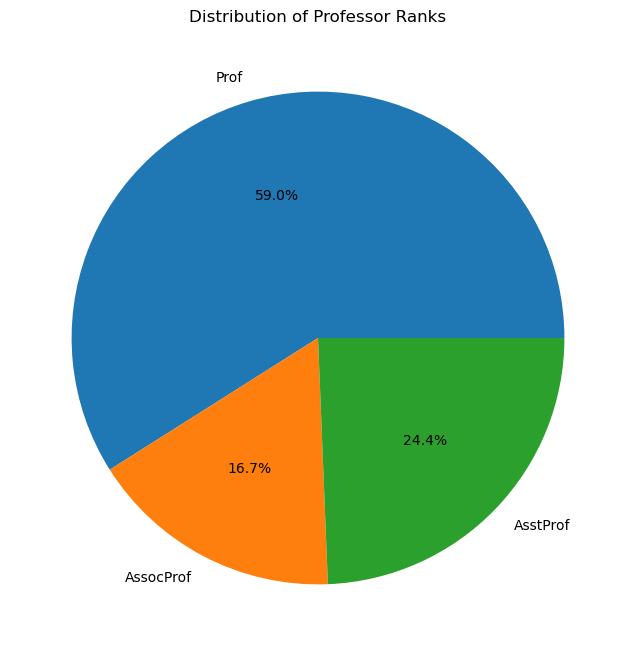

In [29]:
prof_count = len(df[df['rank'] == 'Prof'])
assoc_prof_count = len(df[df['rank'] == 'AssocProf'])
asst_prof_count = len(df[df['rank'] == 'AsstProf'])
print("Number of Professors:", prof_count)
print("Number of Associate Professors:", assoc_prof_count)
print("Number of Assistant Professors:", asst_prof_count)

plt.figure(figsize=(8, 8))
plt.pie([prof_count, assoc_prof_count, asst_prof_count], labels=['Prof', 'AssocProf', 'AsstProf'], autopct='%1.1f%%')
plt.title('Distribution of Professor Ranks')
plt.show()

### 9

In [31]:
senior_employee = df.loc[df['service'].idxmax()]
junior_employee = df.loc[df['service'].idxmin()]
print("Senior most employee:", senior_employee['rank'], senior_employee['gender'], senior_employee['service'])
print("Junior most employee:", junior_employee['rank'], junior_employee['gender'], junior_employee['service'])

Senior most employee: Prof Male 51
Junior most employee: AsstProf Male 0


### 10

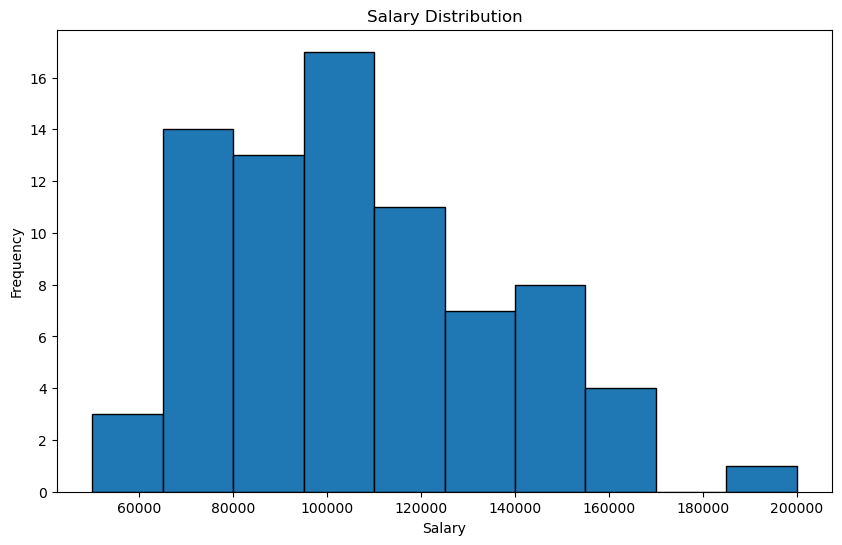

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=range(50000, int(df['salary'].max()) + 15000, 15000), edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()